(unit6.2)=
# Unit 6.2: Bode Plots

Follow along at [cpjobling.github.io/eg-150-textbook/freq_resp/tf_response](https://cpjobling.github.io/eg-150-textbook/freq_resp/bode_plots)

![QR Code for this lecture](pictures/qr_code_for_unit62.png)

## Acknowledgements

This Unit is preparation for EG-247 Digital Signal Processing and EG-243 Modern Control Systems. It will not be examined for EG-150. 

The notes for this unit have been inspired by Carlos Osorio's MATLAB Tech Talks series on [Understanding Bode diagrams](https://uk.mathworks.com/videos/series/understanding-bode-plots-95146.html) {cite}`osorio93` with details adapted from the [Example 5.47](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter5/section/section51) in {cite}`schaum`.

# Agenda

* {ref}`unit6.2.1`
* {ref}`unit6.2.2`
* {ref}`unit6.2.3`
* {ref}`unit6.2.4`
* {ref}`unit6.2.5`
* {ref}`unit6.2.6`
* {ref}`unit6.2.7`
* {ref}`unit6.2.8`

(unit6.2.1)=
## Introduction

We introduce this section with a YouTube video [What are Bode plots?](https://uk.mathworks.com/videos/understanding-bode-plots-what-are-they-2-of-4-76212.html) from Carlos Osorio of the MathWorks (publisher of MATLAB) {cite}`osorio93`

<iframe width="560" height="315" src="https://www.youtube.com/embed/COzQwkeu8Ek?si=wz1Mxz_ISu6RuTfU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

The remaining videos, the first of which introduced the previous unit, {ref}`unit6.1.0`, can also be viewed on the YouTube playlist [Understanding Bode Plots](https://www.youtube.com/playlist?list=PLn8PRpmsu08poVEWzpqKXpj_c7aSwVDdm) also published on the [MATLAB channel by the MathWorks](https://www.youtube.com/@MATLAB).

(unit6.2.2)=
## A little history

::: {figure-md} fig:unit6.2:1
![Hendrick Wade Bode](pictures/Hendrik_Wade_Bode.png)

Portrait of Hendrick Wade Bode (Public Domain [Details](https://en.wikipedia.org/wiki/File:Hendrik_Wade_Bode.png))
:::

Quoted from [Hendrik Wade Bode](https://en.wikipedia.org/wiki/Hendrik_Wade_Bode), Wikipedia:

> Hendrik Wade Bode (December 24, 1905 – June 21, 1982) was an American engineer, researcher, inventor, author and scientist, of Dutch ancestry.

> He made important contributions to control systems theory and mathematical tools for the analysis of stability of linear systems.

> In 1938, [Bode] developed asymptotic phase and magnitude plots, now known as *Bode plots*, which displayed the frequency response of systems clearly.

(unit6.2.3)=
## Frequency Response

::: {figure-md} fig:unit6.2:2
<img src="pictures/ss-freq-response.png" alt="Screenshot from the video What are Bode Plots? (see caption) showing the steady state response of a linear LTI system to a simusoidal input" width="100%" />


Steady-state response of of a stable LTI system is $y(t) = M \sin\left(\omega t + \phi\right)$. Screenshot from video [What are Bode Plots?](https://youtu.be/COzQwkeu8Ek?si=XC1h92VGAQWiHV7N&t=28) [t=28 seconds] from {cite}`osorio93`
:::

In {ref}`unit6.1` we explored the idea of a frequency response and showed that, after the transient response of a stable LTI system, subjected to a sinusoidal input $x(t) = A_\mathrm{in} \sin\left(\omega t\right)$ has died away, the steady-state output will be another sinusoid $y(t) = A_\mathrm{out} \sin\left(\omega t + \phi\right)$. 

This is illustrated in {numref}`fig:unit6.2:2`.

We also showed, in {ref}`u6.1:activity`, that you can plot amplitude gain

$$M = \left|\frac{A_\mathrm{out}}{A_\mathrm{in}} \right|$$

and phase shift $\phi$ of the output against frequency to produce a frequency response diagram such as that shown in {numref}`fig:unit6.2:3`.

::: {figure-md} fig:unit6.2:3
<img src="pictures/bode_plot_1.png" alt="Screenshot from the video What are Bode Plots? (see caption) showing the steady state response of a linear LTI system to a simusoidal input" width="100%" />


Plot of magnitude v phase plotted against frequency interpolated from individual measurements. Screenshot from video [What are Bode Plots?](https://youtu.be/COzQwkeu8Ek?si=XC1h92VGAQWiHV7N&t=28) [t=1 minute 28 seconds] from {cite}`osorio93`
:::

The plot of *amplification* ($M$) and *phase* ($\phi$), usually plotted against the *log of frequency* $\omega$ rad/s, is called a **Bode plot**.

If you are constructing one of these yourself, you need to be sure to use sufficient values of frequency to capture all the important features (such as *resonant peaks* and *corner frequencies*) of the response.

(unit6.2.4)=
## Calculation of Frequency Response

If we have a system with impulse response (transfer function) $H(s)$, the steady-state frequency response can be calulated by letting $s = j\omega$.

That is the *system function*

$$H(j\omega)$$

can be used to compute the frequency response directly.

In particular, the **magnitude**

$$M = \left|\frac{A_\mathrm{out}}{A_\mathrm{in}} \right| = \left|H(j\omega)\right|$$

and the **phase angle**

$$\phi = \angle H(j\omega)$$

``` {note}
The magnitude and phase are usually plotted against $\omega$ on a logarithmic scale with magnitude defined in *decibels*:

$$\left|H(j\omega)\right|_{\mathrm{dB}} = 20\log{10} \left|H(j\omega)\right|$$

and phase in *degrees*: 

$$\phi_\mathrm{deg} = \frac{180}{\pi}\phi_\mathrm{rad}$$

```

In MATLAB, we can easily obtain a Bode plot by defining our system as a transfer function LTI model using the [`tf`](https://uk.mathworks.com/help/control/ref/tf.html) function and passing the system object to the [`bode`](https://uk.mathworks.com/help/control/ref/dynamicsystem.bode.html) function.

In [10]:
format compact
Hsys = tf(400,[1, 10, 400])


Hsys =
 
        400
  ----------------
  s^2 + 10 s + 400
 
Continuous-time transfer function.


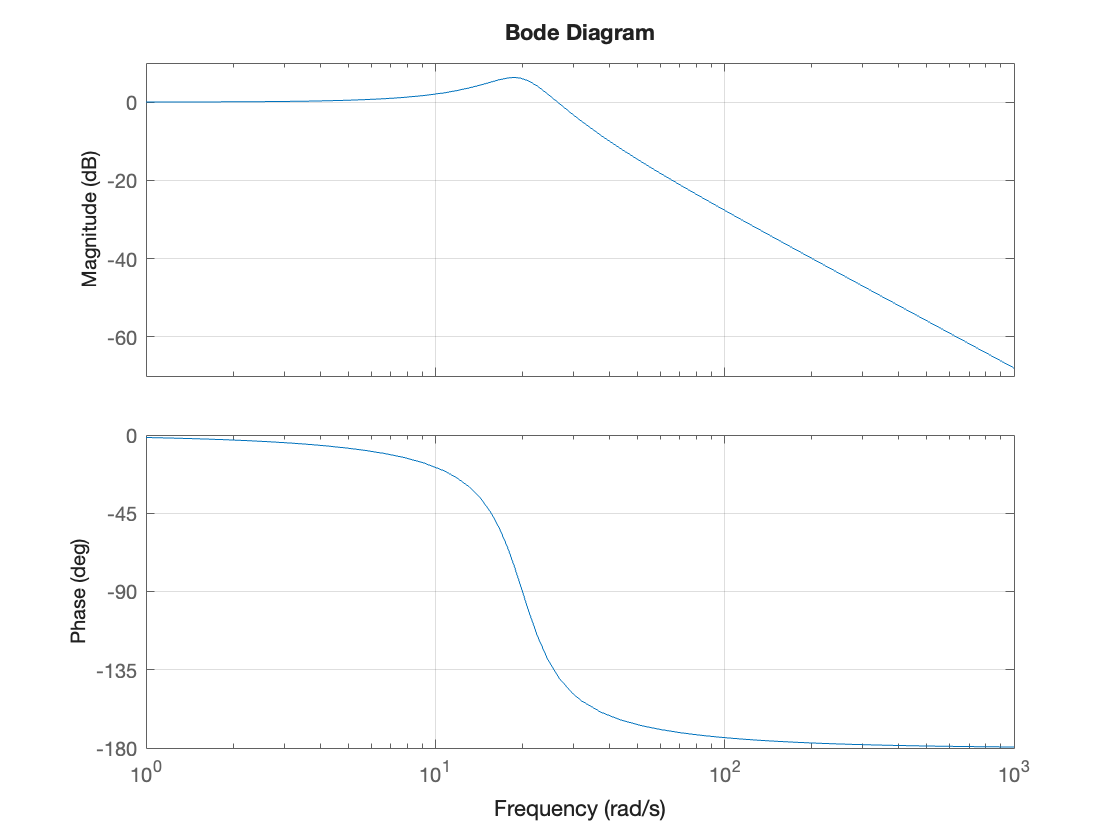

In [11]:
bode(Hsys),grid on

(unit6.2.5)=
## Terminology used

When discussing frequency responses in general, and Bode plots in particular, we need to define some terms that will be used.

You should should make a note of these for future reference.

### DC-gain

Magnitude $M$ at $\omega = 0$ or DC.

<img src="pictures/dc_gain.png" alt="illustration of DC gain" width="75%" />

### Roll-off rate

The *roll-off rate* refers to the slope of the magnitude plot as the magnitude drops off at high-frequency. It is usually quoted in *dB per decade*[^u62:note:1], where a *decade* is a ten-fold increase in frequency.

<img src="pictures/roll-off.png" alt="illustration of roll-off rate" width="75%" />

[^u62:note:1]: Audio engineers quote roll-off in *dB per octave*, where an octave is a doubling of frequency.

## Natural-frequency

Any peaks in the magnitude frequency response will be associated to some natural frequency in the poles of the system.

<img src="pictures/natural_freq.png" alt="illustration of natural frequencies indicated by peaks in the magnitude response" width="100%" />

## Cross-over frequency

In the bode-plot, at low frequency, the gain is 0 dB (or 1). Above the cross-over frequency[^u62:note:2] the gain is less than 1 and the system starts to *attenuate* the input signal. 

<img src="pictures/cross_over_freq.png" alt="illustration of the cross-over frequency in a Bode plot" width="100%" />

[^u62:note:2]: The cross-over refers to the change in response from a *gain* ($M \ge 1$) to an *attenuation* $M < 1$. Above the cross-over frequency the system starts to act like a low-pass filter.

## Bandwidth frequency

Above the *bandwidth frequency* the RMS value of the system is below the RMS value of the input. This so-called *half-power frequency* occurs when $M = \sqrt{2}/2 = 1/\sqrt{2} \approx 0.707$ or $20\log_{10}\left(0.707\right) \approx -3$ dB[^u62:note:3]. 

<img src="pictures/bandwidth_freq.png" alt="illustration of the bandwidth frequency in a Bode plot" width="100%" />

[^u62:note:3]: In filter terms, the bandwidth frequency marks the transition between the *pass-band* and the *stop-band*. In control system terms, the bandwidth gives a limit on the frequencies that you can influence with contollers.

(unit6.2.6)=
## Aysymptotic Bode plots for first-order systems

In the remainder of this unit, we will rely on the explanations given by Carlos Osorio in Parts 3 and 4 of {cite}`osorio93`. This material is also covered in Worked Problem 5.47 from {cite}`schaum`.

You can always produce a Bode plot for a system by use of the tools provided in MATLAB.

However, a knowledge of the asymptotic behaviour of first and second order poles (the insight gained by Bode in 1938), provides a powerful tool for analysis and design of systems in the frequency domain.

### Exploring Bode Plots for Simple Systems

[See video in the notes]

<iframe width="560" height="315" src="https://www.youtube.com/embed/ums33HwVYyw?si=_Lvz5nyCt9VW100U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

(u62:gain)=
### Asymptotic bode plot of a gain

If $H(s) = K$ 

The frequency response is $H(j\omega)$:

$$M = \left|H(j\omega)\right| = K,\,\phi = 0^\circ$$

Converting the magnitude into dB:

$$M_\mathrm{dB} = 20\log_{10}(K)$$

The Bode plot for $H(s) = K = 1 = 0$ dB is

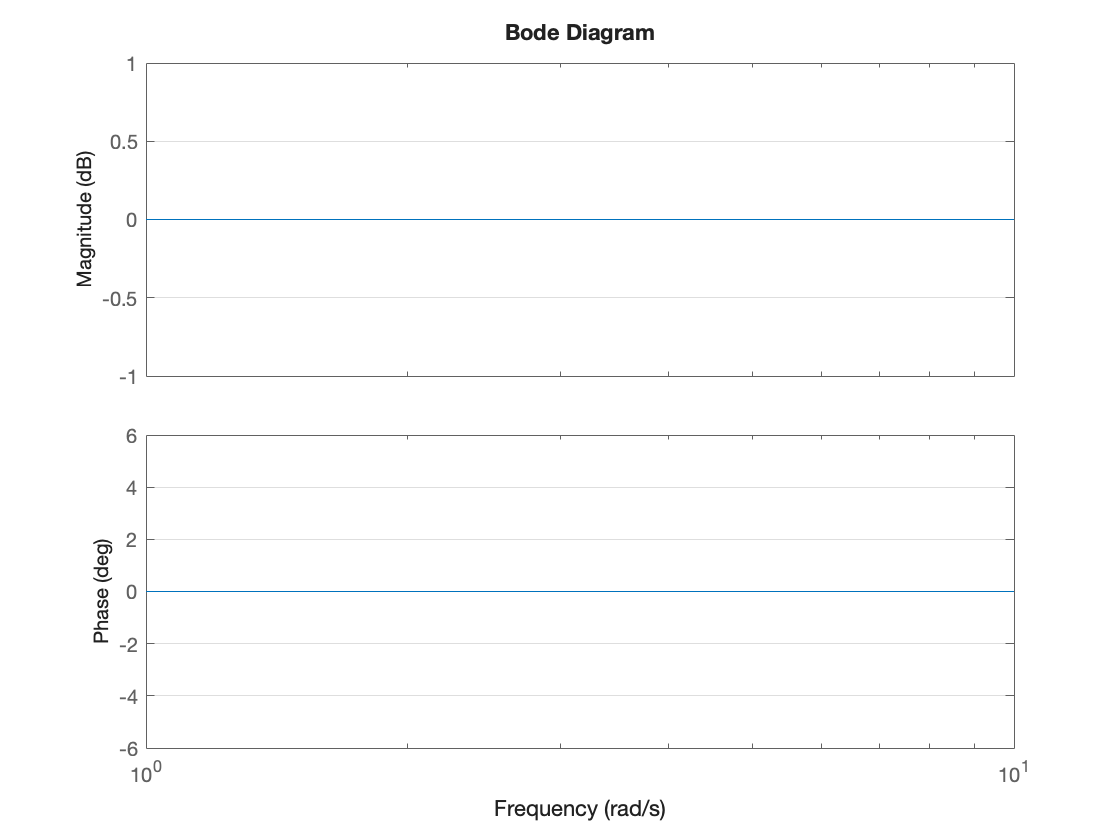

In [12]:
K = 1; H1 = tf(K,1); bode(H1), grid on

Increasing the gain causes a shift in the magnitude plot *up* by $20\log_{10} K$ dB for $K > 1$ or *down* for $K < 1$.

(u62:int)=
### Asymptotic Bode plot of an integrator

If

$$H(s) = \frac{1}{s} $$

The frequency response is

$$H(j\omega) = \frac{1}{j\omega} = -j\frac{1}{\omega}$$

$$M = \left|H(j\omega)\right| = \frac{1}{\omega},\,\phi = -90^\circ$$

Converting the magnitude into dB:

$$M_\mathrm{dB} = 20\log_{10}(1) - 20\log_{10}({\omega})$$

At $\omega = 1$, $M = 1$, $M_\mathrm{dB} = 0$ dB. At $\omega = 10$, $M=1/10 = -20$ dB. The phase shift is $-90^\circ$ for all $\omega$. The bode plot is therefore:

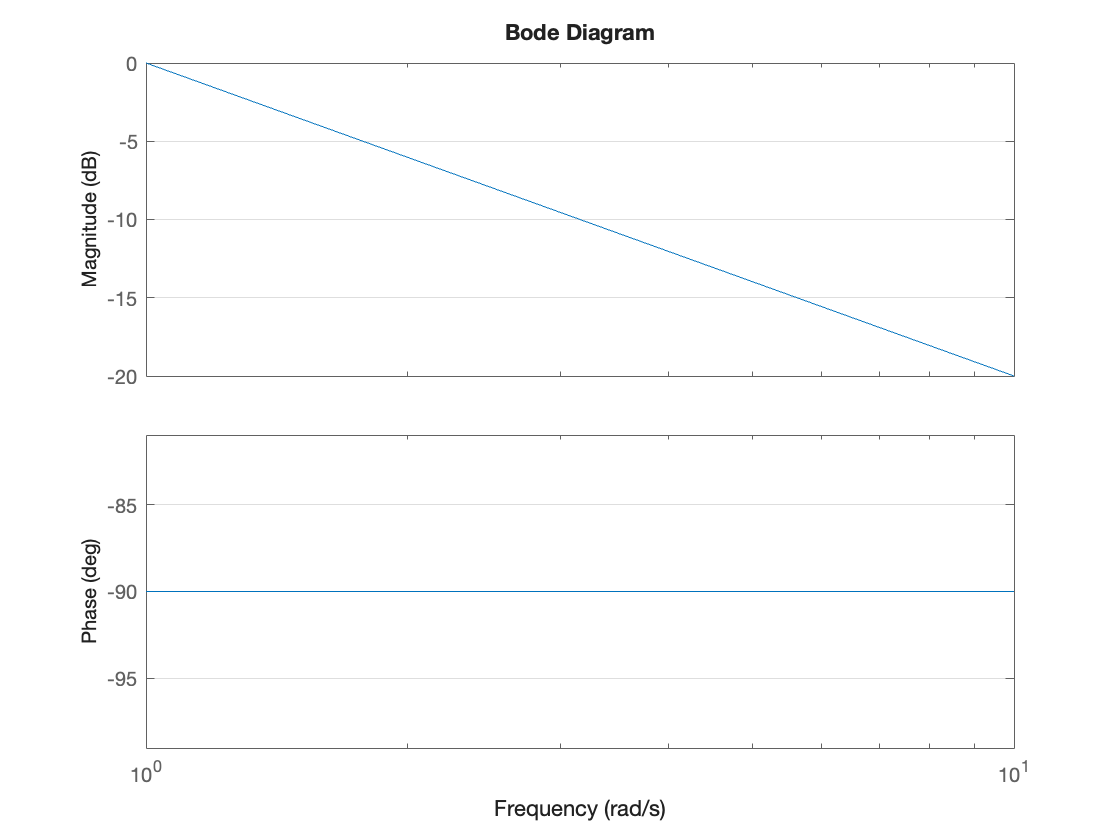

In [13]:
H2 = tf(1,[1, 0]); bode(H2), grid on

The roll-off rate is $-20$ dB/decade.

(u62:diff)=
### Asymptotic Bode plot of an differentiator

If

$$H(s) = s $$

The frequency response is

$$H(j\omega) = j\omega$$

$$M = \left|H(j\omega)\right| = \omega,\,\phi = +90^\circ$$

Converting the magnitude into dB:

$$M_\mathrm{dB} = + 20\log_{10}({\omega})$$

At $\omega = 1$, $M = 1$, $M_\mathrm{dB} = 0$ dB. At $\omega = 10$, $M=10 = 20$ dB. The phase shift is $90^\circ$ for all $\omega$. The bode plot is therefore:

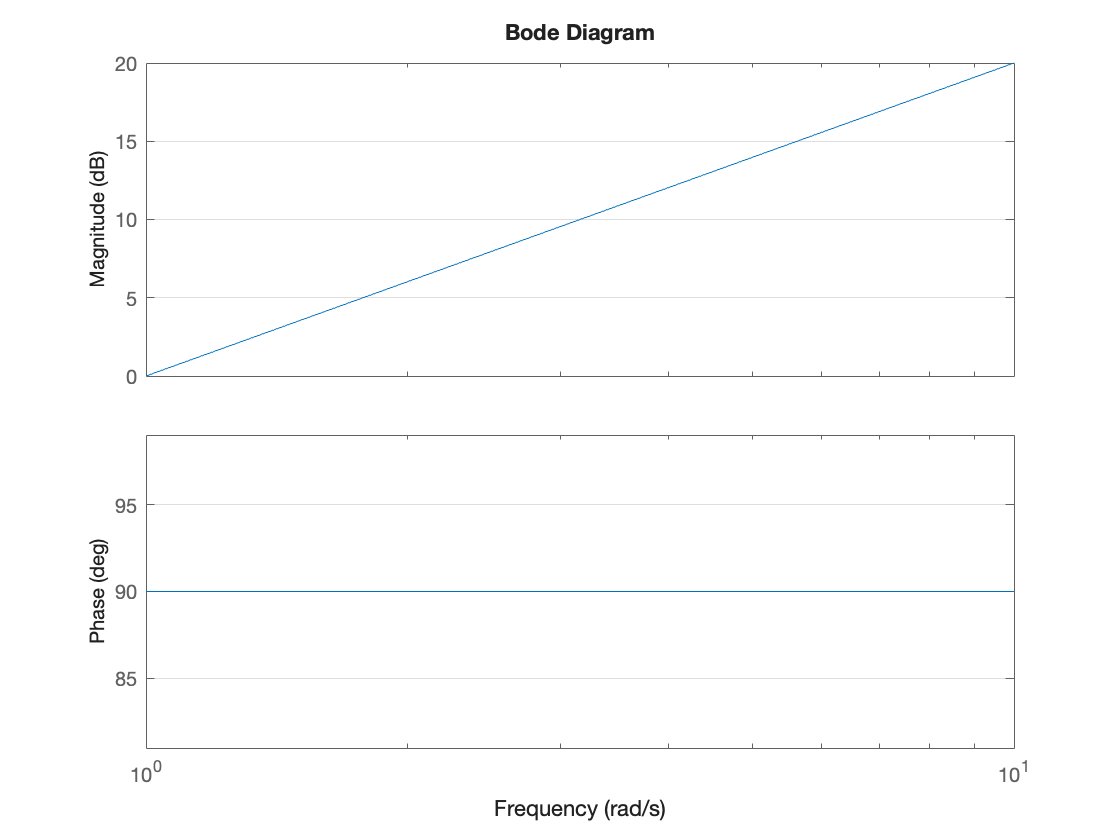

In [14]:
H3 = tf([1 0],1); bode(H3), grid on

The magnification increases by 20 dB per decade and there is no limit! This is a bad thing as it will amplify high-frequencies.

(u62:pole)=
### Asymptotic Bode plot of a single pole

If 

$$H(s) = \frac{1}{\tau s + 1}$$

The frequency response is 

$$H(j\omega) = \frac{1}{j\omega \tau + 1} $$

$$M = \left|H(j\omega\right| = \frac{1}{\sqrt{\tau^2\omega^2 + 1}},\phi = -\tan^{-1} \omega\tau$$

This is complex to visualize, so we concentrate on the asymptotic behaviour.

For $\omega \ll 1/\tau$, $\tau^2\omega^2 \ll 1$, $M \approx 1 = 0$ dB, $\phi \approx 0^\circ$.

For $\omega \gg 1/\tau$, $\tau^2\omega^2 \gg 1$, $M_\mathrm{dB} = 20\log_{10} 1 - 20\log_{10} \sqrt{\tau^2\omega^2} = - 20\log_{10} \left(\tau\omega\right)$ dB, $\phi \approx -90^\circ$.

We can plot this as shown below:

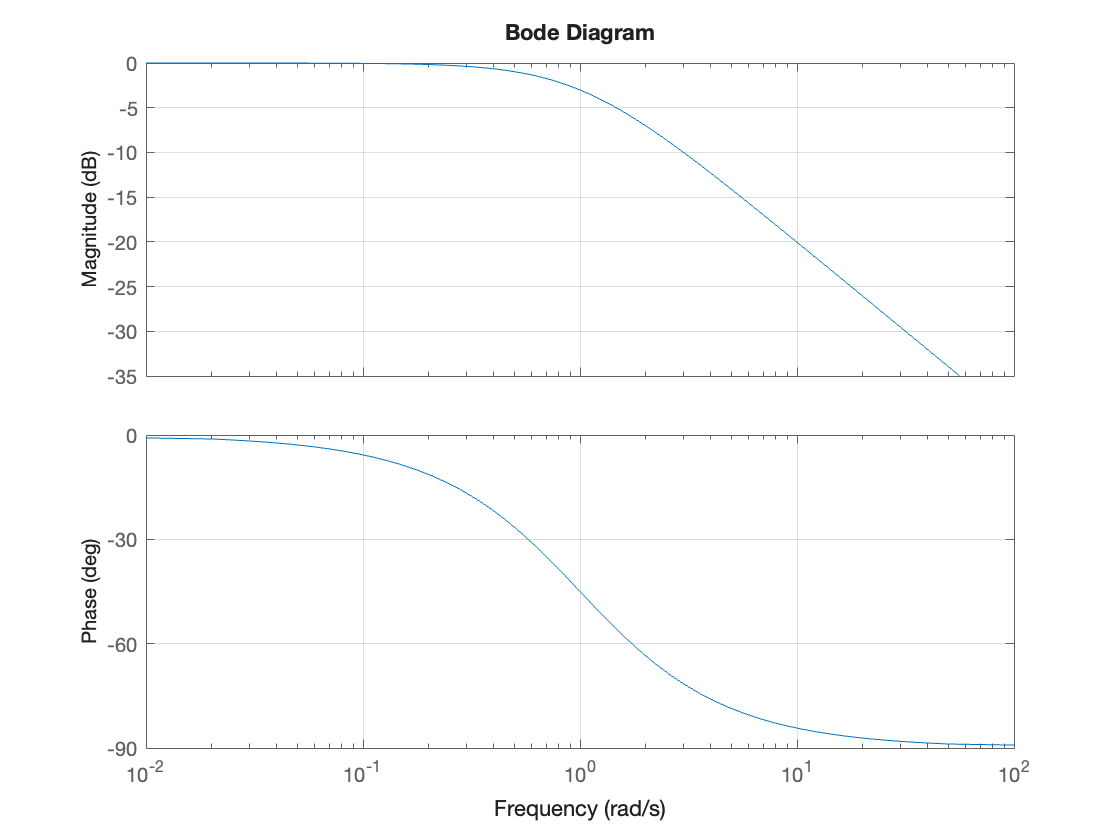

In [15]:
tau = 1; H4 = tf(1,[tau, 1]); bode(H4),grid on

Adding the assymptotes gives

![Bode plot of a single pole with asymptotes added](pictures/bode4.png)

For most of the magnitude Bode plot, the computed plot is well matched by its asymptotes. The maximum error that at $\omega = 1/\tau$, $M = 1/\sqrt{2}$, $M_\mathrm{dB} = -3$ dB, $\phi = -45^\circ$. The asymptotes used on the phase diagram are usually taken to be 0 at $\omega = (1/10)\tau$ and $-90^\circ = \omega = 10\tau$. In that case, the asymptotes and the actual plot are equal ($\phi = -45^\circ$) at the frequency $\omega = 1/\tau$.

(u62:zero)=
### Asymptotic Bode plot of a single zero

If 

$$H(s) = \tau s + 1$$

The frequency response is 

$$H(j\omega) = j\omega \tau + 1 $$

$$M = \sqrt{\tau^2\omega^2 + 1},\phi = \tan^{-1} \omega\tau$$

For $\omega \ll 1/\tau$, $\tau^2\omega^2 \ll 1$, $M \approx 1 = 0$ dB, $\phi \approx 0^\circ$.

For $\omega \gg 1/\tau$, $\tau^2\omega^2 \gg 1$, $M_\mathrm{dB} = 20\log_{10} \sqrt{\tau^2\omega^2} = 20\log_{10} \left(\tau\omega\right)$ dB, $\phi \approx +90^\circ$.

 We can plot this as shown below:

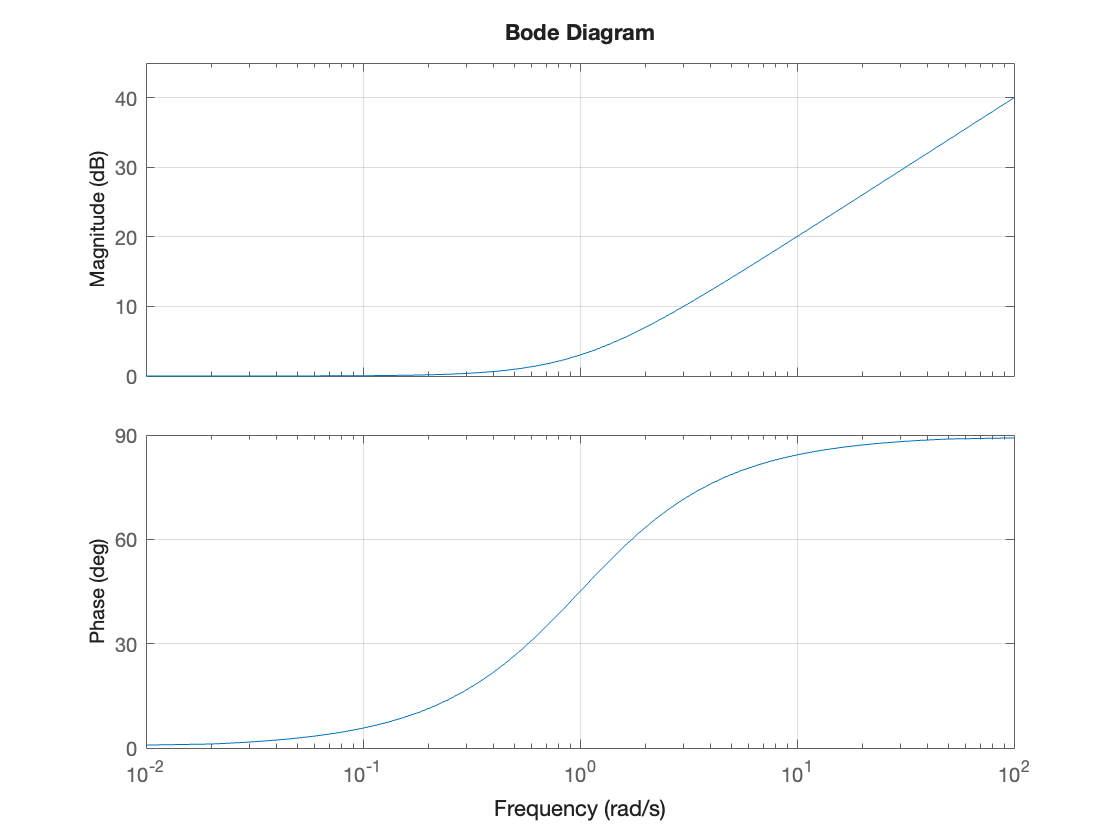

In [16]:
tau = 1; H5 = tf([tau, 1],1); bode(H5),grid on

Adding the assymptotes gives

![Bode plot of a single zero with asymptotes added](pictures/bode5.png)

Again, for most of the magnitude Bode plot, the computed plot is well matched by its asymptotes. The maximum error that at $\omega = 1/\tau$, $M = \sqrt{2}$, $M_\mathrm{dB} = 3$ dB, $\phi = 45^\circ$. The asymptotes used on the phase diagram are usually taken to be 0 at $\omega = (1/10)\tau$ and $90^\circ = \omega = 10\tau$. In that case, the asymptotes and the actual plot are equal ($\phi = 45^\circ$) at the frequency $\omega = 1/\tau$.

### Demo 1: Using the interactive Bode analysis tool provided by MATLAB

This has to be done in MATLAB for desktop or MATLAB online.

* Open MATLAB and select Bode designer

```matlab
H = tf(1,1)
controlSystemDesigner('bode',H)
```

* Show that changing gain shifts plot up or down.

* Add a pole at about $\omega = 1$ rad/s. Show that moving the pole moves the cross-over frequency.

* Erase the pole and add a zero. Move the zero. Note the HF gain. Move the zero to about 0.1 rad/s.

* Add a pole at about $\omega = 1$. Note that multiplication is addition on phase diagram. Note the pole limits the HF gain and phase returns to zero.

* Add another pole close the first pole and note the roll-off is -20 dB/decade.

* Add a third pole and note attenuation becomes -40 dB/decade.

To see the results of this demo, visit the shared MATLAB Drive folder **Week 11** in [EG-150 Signals and Systems](https://drive.mathworks.com/sharing/8cfcd775-d7a3-41f3-ac12-737fae79aba9) and open demo1.mat from inside the controlSystem designer.

(unit6.2.7)=
## Aysymptotic Bode plots for a second-order system

The model second order system is given by the transfer function

$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

where $\omega_n$ is the undamped natural frequency and $\zeta$ is the damping ratio.

As we will see, the shape of the frequency response of this system depends only on $\zeta$ and $\omega_n$. Hence knowledge of this plot allows us to easily analyze a system which has factors that are quadratic polynomials in $s$.

Once again, we will rely on the explanation given by Carlos Osorio in Parts 4 of {cite}`osorio93`.

### How to Build Bode Plots for Complex Systems

[See video in the notes]

<iframe width="560" height="315" src="https://www.youtube.com/embed/MQjdeGNZ4mY?si=02fMhH7QH8yWicSY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Examples of 2nd-order systems

We have already see examples of second order systems in the form of the mass-spring-damper system. Another example from electrical engineering would be the RLC circuit.

Examples of these systems and the transfer functions that they represent are shown in {numref}`fig:unit6.2:4`

::: {figure-md} fig:unit6.2:4
<img src="pictures/2nd_order_systems.png" alt="Screenshot from the video How to Build Bode Plots for Complex Systems? (see caption) showing a mass-spring damper system and an RLC circuit." width="100%" />


Examples of second-order systems. Left: mass-spring-damper system. Right: RLC circuit. Screenshot from video [How to Build Bode Plots for Complex Systems](https://youtu.be/MQjdeGNZ4mY?si=DdGiwbY3zQM_KDdZ&t=47) [t=47 seconds] from {cite}`osorio93`
:::

For the mass-spring-damper system

$$H(s) = \frac{X(s)}{F(s)} = \frac{\frac{1}{m} }{s^2 + \left(\frac{c}{m}\right)s + \left(\frac{k}{m} \right)}$$

and the natural frequency is

$$\omega_n = \sqrt{\frac{k}{m}}.$$

For the RLC circuit

$$H(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)} = \frac{\left(\frac{R}{L}\right)s }{s^2 + \left(\frac{R}{L}\right)s + \left(\frac{1}{LC} \right)}$$

and the natural frequency is

$$\omega_n = \sqrt{\frac{1}{LC}}.$$

Providing that $0 < \zeta \le 1$, the poles of the system will be complex and of the form[^u62:note:10]:

$$p_{1,2} = -\zeta\omega_n \pm j\omega_n \sqrt{1 - \zeta^2}$$

[^u62:note:10]: If $\zeta = 1$ there will be two real and equal poles at $s = -\zeta\omega_n$. If $\zeta > 1$ there will be two real poles at $p_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2 - 1}$. These cases are already covered in {ref}`unit:6.2.6`. You would just add the Bode plots for the real poles (or their asymptotes) together.

(u62:2nd_resp)=
### Asymptotes for a second-oder system

So

$$H(j\omega) = \frac{1}{-\left(\frac{\omega}{\omega_n}\right)^2 + j2\zeta\left(\frac{\omega}{\omega_n} \right)s + 1}$$

To evaluate the asymptotes, we will look at the tendences for frequencies before and after $\omega_n$.

For $\omega \ll \omega_n$ the +1 term in the denominator will dominate and

$$\left|H(j\omega\right)|_\mathrm{dB} \approx 0\,\mathrm{dB}$$

$$\angle H(j\omega = 0^\circ$$

When $\omega = \omega_n$ the square term will cancel the +1 term and the denominator will become

$$\left|H(j\omega)\right|_\mathrm{dB} = 20\log_{10}\left(\frac{1}{2\zeta} \right)\,\mathrm{dB}$$

$$\angle H(j\omega) =  -90^\circ$$

When $\omega \gg \omega_n$ the squared term will dominate, and

$$\left|H(j\omega)\right|_\mathrm{dB} \approx -40\log_{10}\left(\frac{\omega}{\omega_n} \right)\,\mathrm{dB}$$

$$\angle H(j\omega = -180^\circ$$

We have plotted this for the system with $\omega_n = 10$ rad/s and $\zeta = 0.25$ and added the assymptotes:

![Bode plot of a complex pole with asymptotes added](pictures/bode6.png)

Note that the actual peak is to the left of $\omega = \omega_n$. This is because the actual frequency, often called the *damped natural frequency*, is given by $\omega_d = \omega_n\sqrt{1 - \zeta^2}$.

(u62:effect_of_damping)=
### Effect of damping ratio on Bode plot

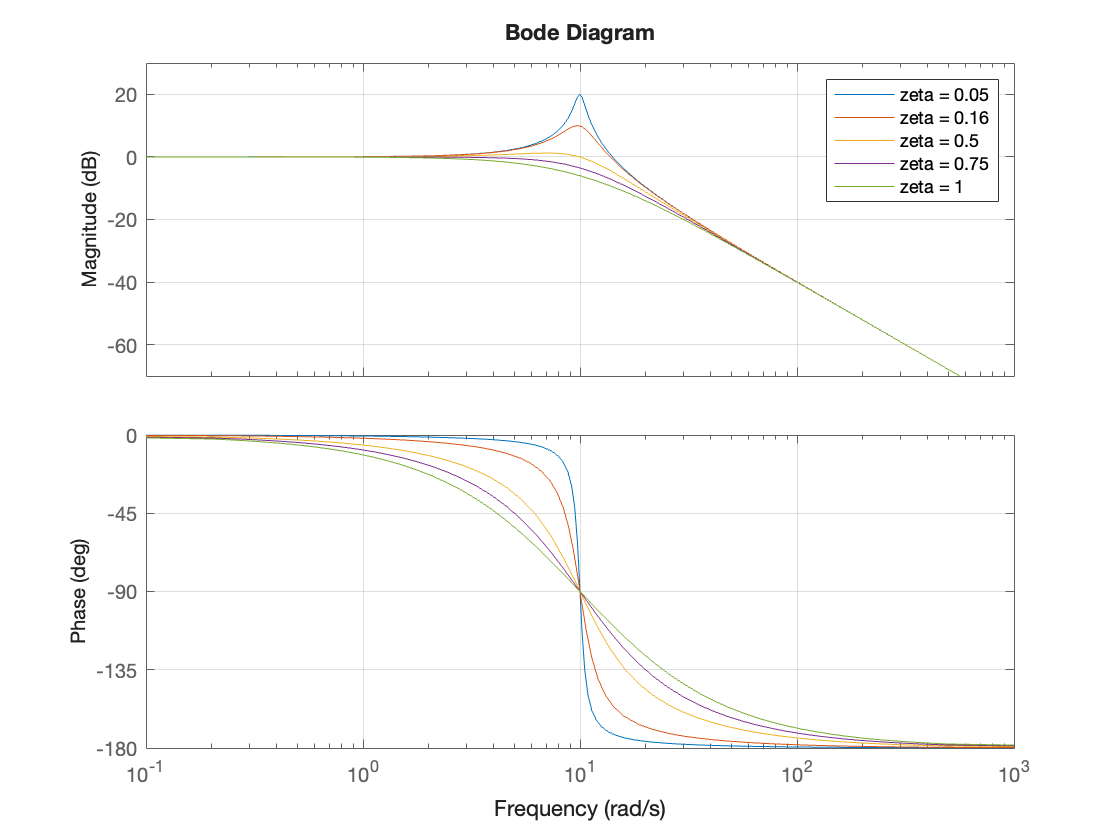

In [17]:
wn = 10;
figure
hold on
for zeta = [0.05, 0.16, 0.5, 0.75, 1]
  bode([wn^2],[1, 2*zeta*wn, wn^2]);
end
grid on
hold off
legend('zeta = 0.05','zeta = 0.16','zeta = 0.5','zeta = 0.75','zeta = 1')

### Demo 2: Complex poles and their Bode diagrams

* Open MATLAB and select Bode designer

```matlab
H = tf(1,1)
controlSystemDesigner('bode',H)
```

* Add a complex pole with $\omega_n = 10$, $\zeta = 1$. Note that there are two real poles.

* Change damping to $\zeta = 0.5$. Note roots become complex. Peak gain is $|1/2\zeta|=1=0$ dB. Cross-over frequency at 0 dB is $\omega_n$.

* Change damping to $\zeta=0.05$. Peak gain is $|1/2\zeta|=10=20$ dB. If you change the natural frequency, you change the location of the peak, not the size of the peak. Change $\omega_n = 1$ rad/s.

* Change the gain to 10. Note that the magnitude plot shifts up 20 dB. This illustrates the additive properties of the bode diagram. Because the phase of a gain is 0, the phase is unaffected. 

* Add a zero at $\omega = 10$ rad/s. Note the roll-off slope changes from -40 dB/decade to -20 dB/decade. The final phase changes from $-180^\circ$ to $-90^\circ$. Add another pole close the first pole and note the roll-off is -20 dB/decade.

* Change the thrird pole to $\omega = 100$ rad/s ($\tau = 0.01$). Note final magnitude slope retrurns to -40 db/decade and final phase returns to $-180^\circ$.

* Change damping to $1/\sqrt{2}$ to illustrate what is called *ideal damping*. Here there is no overshoot and the magnitude is -3 dB at $\omega = \omega_n$.

After this exercise, the final transfer function is

$$\frac{10\left(0.1s + 1\right)}{\left(0.01s + 1\right)\left(s^2 + 0.1s + 1\right)} $$

So, using this concept of superposition we can easily construct any transfer function that we are interested in studying. 

All we need to do is break down or factor the transfer function into smaller constructs, and then graphically add all of those traces together as shown in {numref}`fig:unit6.2:6`.

To see the results of this demo, visit the shared MATLAB Drive folder **Week 11** in [EG-150 Signals and Systems](https://drive.mathworks.com/sharing/8cfcd775-d7a3-41f3-ac12-737fae79aba9) and open demo2.mat from inside the controlSystem designer.

::: {figure-md} fig:unit6.2:6
<img src="pictures/superposition.png" alt="Screenshot from the video How to Build Bode Plots for Complex Systems? (see caption) showing the idea of superpostion." width="100%" />

The idea of superpostion: a bode diagram can be obtained by adding the magnitude and phase of the component bode plots  [What are Bode Plots?](https://youtu.be/MQjdeGNZ4mY?si=0KeRrQKVikU281JX&t=413) [t=6 minute 53 seconds] from {cite}`osorio93`
:::

(unit6.2.8)=
## Bode plots for analysis and design

As we have seen, the Bode plot is a useful system analysis tool. 

With MATLAB and the Control System Designer tool is is very easy to explore the behaviour of indiviual poles and zeros and see how the combination of poles and zeros impact the overall frquency response.

It is also a very useful tool for examining the stability, gain and phase margin for feedback control systems. 

You can also use the superposition properties of the Bode plot to facilitae the design of PID, lead and lag controllers in control system design. 

You will study the latter two applications in EG-243 next year.

## Summary

In this unit we have explored the Bode plot and demonstrated its properties usful for the analysis of LTI systems.

We covered the following topics

* {ref}`unit6.2.1`
* {ref}`unit6.2.2`
* {ref}`unit6.2.3`
* {ref}`unit6.2.4`
* {ref}`unit6.2.5`
* {ref}`unit6.2.6`
* {ref}`unit6.2.7`
* {ref}`unit6.2.8`

(unit6.2:takeaways)=
### Unit 6.2: Take Aways

#### Frequency response

The steady-state output of a linear time-invariant system $H(s)$ subject to a waveform $x(t) = A_{\mathrm{in}}\sin\left(\omega t\right)$ is

$$y(t) = M\sin\left(\omega t + \phi\right)$$

where $M = \left|A_\mathrm{out}/A_\mathrm{in}\right| = \left|H(j\omega)\right|$ and $\phi = \angle H(j\omega)$ rad/s. Both $M$ and $\phi$ depend only in the system transfer function (Laplace transform of the impulse response) and are functions of $\omega$.

#### Bode plot

The Bode plot is a plot of $M_{\mathrm{dB}} = 20\log_{10} M$ dB and phase $\phi_\mathrm{degree} = (180/\pi)\phi_{\mathrm{radian}}$ plotted against $\log_{10} \omega$.

A Bode plot magnitude and phase plots have the property of *superposition*. That is, to obtain the Bode plot of a complex transfer function, we add the Bode plots of the real and complex factors (poles and zeros) of the transfer function.

#### Key definitions

Terms used in the discussion of Bode plots are *DC-gain*, *roll-off rate*, *natural-frequency*, *cross-over frequency* and *bandwidth frequency* are defined in {ref}`unit6.2.5`.

#### Asymptotic bode plots

These are linear approximations to the magnitude and phase plots which are very useful is assessing the frequency response of a system without computing it mathematically.

In summary these are:

* Gain $K$: horizontal line with $M_\mathrm{dB} = 20\log_{10} K$ and $\phi = 0^\circ$. See {ref}`u62:gain` for details.

* Integrator $H(j\omega) = 1/j\omega$: line $M = -20 \log{10} \omega$ and phase $\phi = -90^\circ$. The magnitude is plotted as a line with slope -20 dB/decade passing through $0$ dB at $\omega=1$ rad/s. The phase is an horizontal line at $\phi = -90^\circ$. See {ref}`u62:int` for details.

* Differentiator $H(j\omega) = j\omega$: line $M = 20 \log{10} \omega$ and phase $\phi = +90^\circ$. The magnitude is plotted as a line with slope 20 dB/decade passing through $0$ dB at $\omega=1$ rad/s. The phase is an horizontal line at $\phi = +90^\circ$. See {ref}`u62:diff` for details.

* Single pole $H(j\omega) = 1/(\tau j\omega + 1)$: at $\omega \ll 1/\tau$ the magnitude asymptote is horizontal line at $0$ dB; at $\omega \gg 1/\tau$ the magnitude asymptote is a line with slope $-20$ dB/decade with origin at 0 dB at $\omega = 1/\tau$. The phase transitions from $\phi = 0^\circ$ to $-90^\circ$ over a range of about a decade below $\omega = 1/\tau$ to $\phi = -90^\circ$ a decade above $\omega = 1/\tau$. The magnitude is -3 dB at $\omega + 1/\tau$. The phase $\phi = -45^\circ$ at $\omega = 1/\tau$. A common asymptotic approximation of the phase is an horizontal line at $0^\circ$ up to $\omega = 0.1/\tau$, an line with slope $-45^\circ$ per decade between $0.1/\tau \lt \omega \lt 10/\tau$ (which will pass through $\phi = -45^\circ$ at $\omega = 1/\tau$), and a further horizontal line at $\phi = -90^\circ$ which starts at $\omega = 10\tau$. See {ref}`u62:pole` for details.

* Single zero $H(j\omega) = \tau j\omega + 1$: at $\omega \ll 1/\tau$ the magnitude asymptote is horizontal line at $0$ dB; at $\omega \gg 1/\tau$ the magnitude asymptote is a line with slope $20$ dB/decade with origin at 0 dB at $\omega = 1/\tau$. The phase transitions from $\phi = 0^\circ$ to $90^\circ$ over a range of about a decade below $\omega = 1/\tau$ to $\phi = 90^\circ$ a decade above $\omega = 1/\tau$. The phase $\phi = 45^\circ$ at $\omega = 1/\tau$. A common asymptotic approximation of the phase is an horizontal line at $0^\circ$ up to $\omega = 0.1/\tau$, an line with slope $45^\circ$ per decade between $0.1/\tau \lt \omega \lt 10/\tau$ (which will pass through $\phi = 45^\circ$ at $\omega = 1/\tau$), and a further horizontal line at $\phi = 90^\circ$ which starts at $\omega = 10\tau$. See {ref}`u62:zero` for details.

#### Second order-systems

The model is 

$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

In the frequency response, the key properties are governed by samping ratio $\zeta$ and natural frequency $\omega_n$ rad/s.

The propertes are summarized below. For full details see {ref}`u62:2nd_resp`.

* The natual frequency defines the position of the cross-over frequency.
* If $0 \lt \zeta \le 1$ the asymptotic bode plot is similar in shape to the single pole case except that the cross-over frequency is around $\omega = \omega_n$. The high frequency asymtote has a roll-off of -40 dB/decade. The maximum magnification is $M_\max = 20 \log_{10}\left|1/(2\zeta)\right|$ and occurs at the *damped natural frequency* $\omega_d = \omega_n\sqrt{1 - \zeta^2}$. The phase transitions from $\phi = 0^\circ$ at low frequencies to $\phi = -180^\circ$ at high frequency. The height of the peak magnification and the shape of the phase diagram depends on $\zeta$. The peak is higher and phase transition has a highwer slope for low values of $\zeta$. A plot comparing the response of multiple values of $\zeta$ is given in {ref}`u62:effect_of_damping`

* If $\zeta = 1/\sqrt{2}$ we have what is sometimes called *ideal damping*. The response is flat (no overshoot) and  the response has an attenuation of - 3 dB at $\omega = \omega_n$. This response is also called a *Butterworth response*.

* If $\zeta = 1$ (critical damping) the response is the sum of Bode plots of the two equal real poles $s_{1,2} = -\zeta\omega_n$.

* If $\zeta \gt 1$ (overdamped) the response is the sum of Bode plots of the two distinct real poles $s_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2 - 1}$.

#### Applications of Bode diagrams

Bode diagrams are primarily used in the analysis of stability of feedback systems. If the Bode plot respresents the frequency system of an *open-loop system*, concepts such as *phase- and gain-margin* can be developed and analysed using the Bode diagram. The superposition property is usefully used in the design of PID, lead and lag compensators and the use of tools like MATLAB's Control System Design tool faciltates the design of such compensation schemes. You will explore these applications of Bode plots in EG-243 Control Systems next year.

#### MATLAB functions introduced

* `tf`: defines a system model as a transfer function
* `bode`: plots the Bode plot of a system
* `controlSystemDesigner`: an app provided in the MATLAB Control System Toolbox for exploring LTI systems.

## Coming Next

This concludes the course material for EG-150 Signals and Systems.

We will build on the topics introduced in the follow-on module *EG-247 Digital Control Systems* which you can preview by visiting the online textbook [eg-247-textbook](https://cpjobling.github.io/eg-247-textbook).

## References

```{bibliography}
:filter: docname in docnames
```

## Footnotes